# Intel® Extension for PyTorch (IPEX)

Intel® Extension for PyTorch is a Python package to extend official PyTorch. It is designed to make the Out-of-Box user experience of PyTorch CPU better while achieving good performance. The extension brings new functions, but also ofurther ptimizations (for example, take advantage of Intel's new hardware features).

In [1]:
import time
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

In [2]:
net = torchvision.models.resnet50(pretrained=False)
net.eval()

/opt/intel/inteloneapi/pytorch/latest/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/intel/inteloneapi/pytorch/latest/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
img = Image.open('content/flower.jpg').convert('RGB')
resize = transforms.Resize([1280, 1920])
img = resize(img)
to_tensor = transforms.ToTensor()
tensor = to_tensor(img)
data = tensor.unsqueeze(0) # torch.Size([1, 3, 224, 224])

## Performance evaluations

We conduct several tests with and without IPEX and for each test, we further evaluate running in Python as as well in JIT mode, that is, natively (outside Python).

The following tests will be conducted:

*With IPEX disabled:*

1. Within PyTorch
2. Natively

*With IPEX enabled:*

3. Within PyTorch
4. Natively



In [12]:
##See jobs
!echo "Instances available:"
!pbsnodes | grep properties | awk '{print $3}' | sort | uniq -c

Instances available:
     25 core,tgl,i9-11900kb,ram32gb,netgbe,gpu,gen11
     78 xeon,cfl,e-2176g,ram64gb,net1gbe,gpu,gen9
      4 xeon,clx,ram192gb,net1gbe,batch,extended,fpga,stratix10,fpga_runtime
      6 xeon,icx,gold6348,ramgb,netgbe,jupyter,batch
     28 xeon,icx,plat8358,ram256gb,net1gbe,batch
      8 xeon,icx,plat8380,ram2tb,net1gbe,batch
     12 xeon,skl,gold6128,ram192gb,net1gbe,fpga_runtime,fpga,arria10
     86 xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch
     35 xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch,fpga_compile
     12 xeon,skl,ram384gb,net1gbe,renderkit


In [15]:
!pbsnodes 

s001-n001
     state = offline
     power_state = Running
     np = 2
     properties = xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch
     ntype = cluster
     status = rectime=1668773230,macaddr=a4:bf:01:38:e0:68,cpuclock=Fixed,varattr=,jobs=,state=free,netload=76967787396,gres=,loadave=0.23,ncpus=24,physmem=196730604kb,availmem=190214984kb,totmem=198729448kb,idletime=3952779,nusers=2,nsessions=2,sessions=575 845,uname=Linux s001-n001 5.4.0-126-generic #142-Ubuntu SMP Fri Aug 26 12:12:57 UTC 2022 x86_64,opsys=linux
     mom_service_port = 15002
     mom_manager_port = 15003

s001-n045
     state = down
     power_state = Running
     np = 2
     properties = xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch,fpga_compile
     ntype = cluster
     mom_service_port = 15002
     mom_manager_port = 15003

s001-n002
     state = job-exclusive
     power_state = Running
     np = 2
     properties = xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch
     ntype = cluster
     jobs = 0/2045806

     ntype = cluster
     mom_service_port = 15002
     mom_manager_port = 15003

s041-n003
     state = down,offline
     power_state = Running
     np = 2
     properties = xeon,icx,plat8358,ram256gb,net1gbe,batch
     ntype = cluster
     mom_service_port = 15002
     mom_manager_port = 15003

s041-n004
     state = down,offline
     power_state = Running
     np = 2
     properties = xeon,icx,plat8358,ram256gb,net1gbe,batch
     ntype = cluster
     mom_service_port = 15002
     mom_manager_port = 15003

s041-n005
     state = down,offline
     power_state = Running
     np = 2
     properties = xeon,icx,plat8358,ram256gb,net1gbe,batch
     ntype = cluster
     mom_service_port = 15002
     mom_manager_port = 15003

s041-n006
     state = down,offline
     power_state = Running
     np = 2
     properties = xeon,icx,plat8358,ram256gb,net1gbe,batch
     ntype = cluster
     mom_service_port = 15002
     mom_manager_port = 15003

s041-n007
     state = down,offline
     power_state =

In [34]:
%%writefile test_cpu.sh
#cd $PBS_O_WORKDIR
echo "* Hello world from compute server `hostname`!"
echo "* The current directory is ${PWD}."
echo "* Compute server's CPU model and number of logical CPUs:"
lscpu | grep 'Model name\\|^CPU(s)'
echo "* Python available to us:"
which python
python --version
echo "* The job can create files, and they will be visible back in the Notebook." > test1.txt
sleep 10
echo "*Bye"
# Remember to have an empty line at the end of the file; otherwise the last command will not run


Overwriting test_cpu.sh


In [35]:
!qsub test_cpu.sh -l nodes=1:s001-n144:ppn=2
#!qsub test_cpu.sh

2045951.v-qsvr-1.aidevcloud


In [3]:
!echo "* How many compute servers are available?"
!pbsnodes | grep "^s" | wc -l

!echo "* How many of them are free?"
!pbsnodes | grep "state = free" | wc -l

!echo "* What are the time limits for queued jobs?"
!qmgr -c 'p q batch' | grep walltime

!echo "* What is the configuration of the available compute servers?"
!pbsnodes | grep properties | sort | uniq

* How many compute servers are available?
294
* How many of them are free?
109
* What are the time limits for queued jobs?
set queue batch resources_max.walltime = 24:00:00
set queue batch resources_default.walltime = 06:00:00
* What is the configuration of the available compute servers?
     properties = core,tgl,i9-11900kb,ram32gb,netgbe,gpu,gen11
     properties = xeon,cfl,e-2176g,ram64gb,net1gbe,gpu,gen9
     properties = xeon,clx,ram192gb,net1gbe,batch,extended,fpga,stratix10,fpga_runtime
     properties = xeon,icx,gold6348,ramgb,netgbe,jupyter,batch
     properties = xeon,icx,plat8358,ram256gb,net1gbe,batch
     properties = xeon,icx,plat8380,ram2tb,net1gbe,batch
     properties = xeon,skl,gold6128,ram192gb,net1gbe,fpga_runtime,fpga,arria10
     properties = xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch
     properties = xeon,skl,gold6128,ram192gb,net1gbe,jupyter,batch,fpga_compile
     properties = xeon,skl,ram384gb,net1gbe,renderkit


#### Without IPEX, in PyTorch

In [4]:
import time
time_no_ipex_obj = %timeit -r10 -o net(data)
print('Runtime: {} s'.format(time_no_ipex_obj))

1.42 s ± 78.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
Runtime: 1.42 s ± 78.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each) s


In [5]:
time_no_ipex = time_no_ipex_obj.best

#### Without IPEX, with TorchScript

TorchScript is a way to create serializable and optimizable models from PyTorch code. Any TorchScript program can be saved from a Python process and loaded in a process where there is no Python dependency.

With Torchscript, a pure Python programcan be run independently from Python, such as in a standalone C++ program. This makes it possible to train models in PyTorch using familiar tools in Python and then export the model via TorchScript to a production environment where Python programs may be disadvantageous for performance and multi-threading reasons.

In [6]:
net = torch.jit.trace(net, data)
time_no_ipex_native_obj = %timeit -r10 -o net(data)
print('Runtime: {} s'.format(time_no_ipex_native_obj))

1.48 s ± 39.4 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
Runtime: 1.48 s ± 39.4 ms per loop (mean ± std. dev. of 10 runs, 1 loop each) s


In [7]:
time_no_ipex_native = time_no_ipex_native_obj.best

#### With IPEX, in PyTorch

To explore the Intel® Extension for PyTorch, you just need to convert the model and input tensors to the extension device, then the extension will be enabled automatically. 

Let's first reset the network from being jitted.

In [8]:
net = torchvision.models.resnet50(pretrained=False)
net.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
import intel_extension_for_pytorch as ipex
model = net.to(memory_format=torch.channels_last)
model = ipex.optimize(model)
data = data.to(memory_format=torch.channels_last)

In [10]:
time_with_ipex_obj = %timeit -r10 -o model(data)
print('Runtime: {} s'.format(time_with_ipex_obj))

788 ms ± 43.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
Runtime: 788 ms ± 43.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each) s


In [11]:
time_with_ipex = time_with_ipex_obj.best

#### With IPEX, with TorchScript

In [13]:
model = torch.jit.trace(model, data)
time_with_ipex_native_obj = %timeit -r10 -o model(data)
print('Runtime: {} s'.format(time_with_ipex_native_obj))

830 ms ± 2.71 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
Runtime: 830 ms ± 2.71 ms per loop (mean ± std. dev. of 10 runs, 1 loop each) s


In [14]:
time_with_ipex_native = time_with_ipex_native_obj.best

Let's now visualize the results. 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

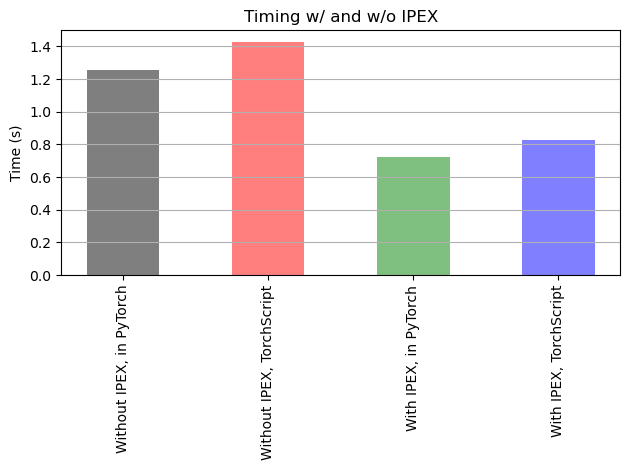

In [16]:
## Import data visualization packages

# Create arrays for the plot
x_axis = ['Without IPEX, in PyTorch', 'Without IPEX, TorchScript', 'With IPEX, in PyTorch', 'With IPEX, TorchScript']
x_pos = np.arange(len(x_axis))
y_axis = [time_no_ipex, time_no_ipex_native, time_with_ipex, time_with_ipex_native]


# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, y_axis, align='center', width=0.5, alpha=0.5, color=['black', 'red', 'green', 'blue'])
ax.set_ylabel('Time (s)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_axis)
plt.xticks(rotation = 90)
ax.set_title('Timing w/ and w/o IPEX')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

